In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# تنظیمات اولیه
image_size = (150, 150)
batch_size = 32

# مسیر دیتاست (قبلش باید دانلود شده باشه و پوشه‌بندی شده باشه به صورت: train/yes, train/no, val/yes, val/no)
base_dir = 'C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Create-Model-brain-tumor-detection(yes-or-no)/Dataset'  # مسیر دیتاست به‌روزرسانی شود
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [6]:
# Data Augmentation برای افزایش تنوع داده‌ها
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 6879 images belonging to 2 classes.
Found 738 images belonging to 2 classes.


In [8]:
# ساخت مدل CNN ساده
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# آموزش مدل
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
215/215 [==============================] - 212s 976ms/step - loss: 0.5141 - accuracy: 0.7222 - val_loss: 0.3282 - val_accuracy: 0.8753
Epoch 2/20
215/215 [==============================] - 189s 879ms/step - loss: 0.3335 - accuracy: 0.8603 - val_loss: 0.3531 - val_accuracy: 0.8726
Epoch 3/20
215/215 [==============================] - 187s 868ms/step - loss: 0.2794 - accuracy: 0.8873 - val_loss: 0.2702 - val_accuracy: 0.8957
Epoch 4/20
215/215 [==============================] - 187s 870ms/step - loss: 0.2292 - accuracy: 0.9064 - val_loss: 0.1844 - val_accuracy: 0.9336
Epoch 5/20
215/215 [==============================] - 189s 880ms/step - loss: 0.2084 - accuracy: 0.9170 - val_loss: 0.1655 - val_accuracy: 0.9404
Epoch 6/20
215/215 [==============================] - 201s 935ms/step - loss: 0.1748 - accuracy: 0.9256 - val_loss: 0.1159 - val_accuracy: 0.9539
Epoch 7/20
215/215 [==============================] - 235s 1s/step - loss: 0.1389 - accuracy: 0.9512 - val_loss: 0.1087 - va

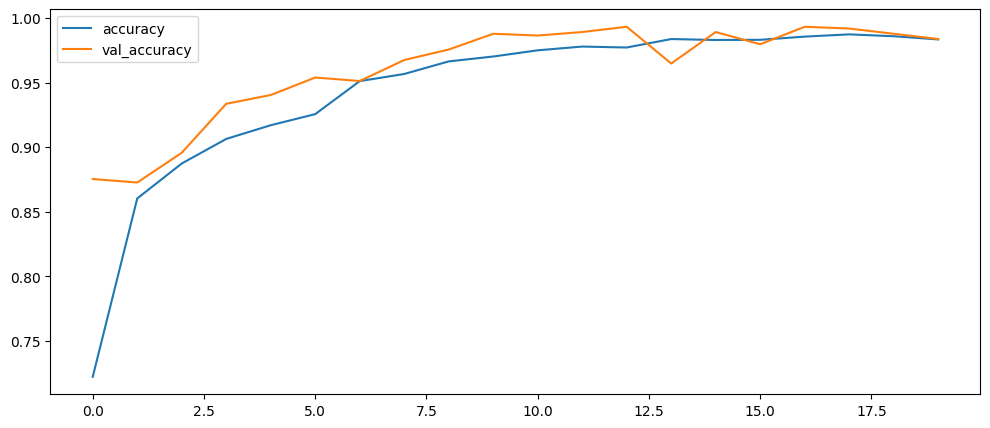

In [10]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['accuracy'], label = 'accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax.legend()

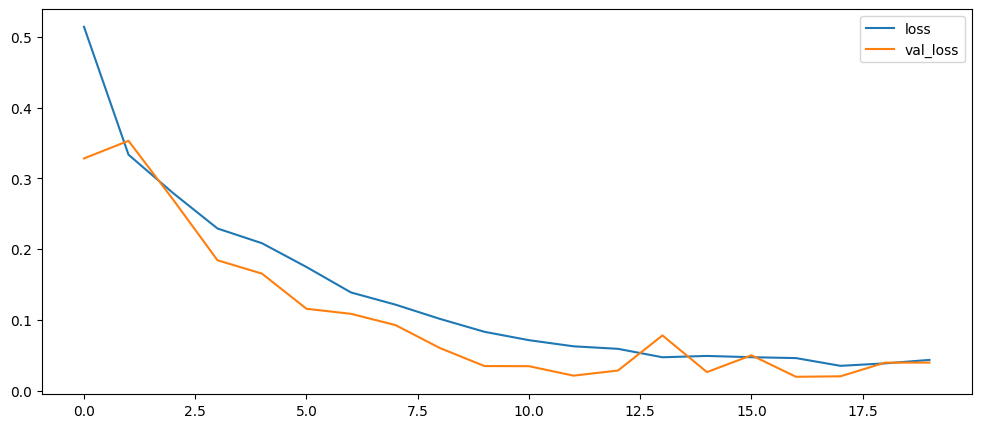

In [11]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label = 'loss')
ax.plot(history.history['val_loss'], label = 'val_loss')
ax.legend()

In [12]:
import glob
import cv2 as cv
#savepath = "C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Dataset/Final-model-outputs2"
#imagefiles = glob.glob("C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Dataset/Car/car-picture2/*.jpg")

#savepath = "C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Dataset/Final-model-outputs"
imagefiles = glob.glob("C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Create-Model-brain-tumor-detection(yes-or-no)/Dataset/test/*.jpg")
imagefiles.sort()

xtest = []
for filename in imagefiles:
    img = cv.imread(filename)
    img = cv.resize(img, (150,150))
    img = img / 255.0  # نرمال‌سازی مثل ImageDataGenerator(rescale=1./255)
    #img = np.expand_dims(img, axis=0)  # اضافه کردن batch dimension
    xtest.append(img)

num_images = len(xtest)
num_images

124

In [13]:
xtest = np.array(xtest)

In [14]:
ytest = []
for i in imagefiles:
    ytest.append(int(i[-5:-6:-1]))

ytest = np.array(ytest)

In [15]:
loss_accuracy = model.evaluate(xtest, ytest, verbose=0)
print('loss:', loss_accuracy[0])
print('accuracy:', loss_accuracy[1])

loss: 0.08134367316961288
accuracy: 0.975806474685669


In [16]:
y_pred = (model.predict(xtest) > 0.5).astype("int32")

4/4 [==============================] - 1s 202ms/step


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.99      0.97      0.98        68

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



<Axes: >

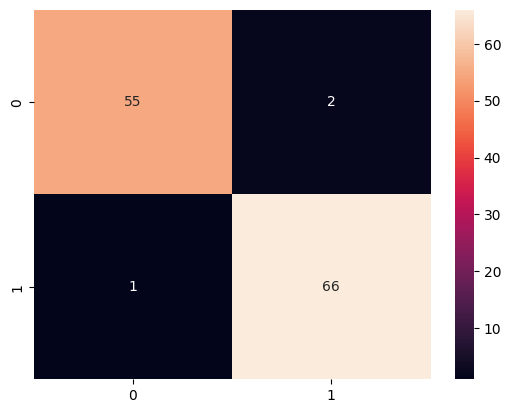

In [17]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(y_pred, ytest), annot=True)

In [18]:
model.save('tumor_detection_model(yes_or_no).h5')